# Predict no of upvotes:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime
import os

In [3]:
train_data=pd.read_csv("train_NIR5Yl1.csv")

In [4]:
train_data.shape

(330045, 7)

In [5]:
print("\nEDA ON TRAIN DATA\n")
print("-"*30)
print("\nColumns : \n", train_data.columns)
print("\n\nNumber of Columns : ", len(train_data.columns))
print("\nNumber of Rows : ",len(train_data))
print("\n\nData Types :\n", train_data.dtypes)
print("\nContains Empty cells : ", train_data.isnull().values.any())
print("\nTotal empty cells by column :\n", train_data.isnull().sum(), "\n\n")


EDA ON TRAIN DATA

------------------------------

Columns : 
 Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')


Number of Columns :  7

Number of Rows :  330045


Data Types :
 ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

Contains Empty cells :  False

Total empty cells by column :
 ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64 




In [6]:
test_data=pd.read_csv("test_8i3B3FC.csv")

In [7]:
print("\nEDA ON TEST DATA\n")
print("-"*30)
print("\nColumns : \n", test_data.columns)
print("\n\nNumber of Columns : ", len(test_data.columns))
print("\nNumber of Rows : ",len(test_data))
print("\n\nData Types :\n", test_data.dtypes)
print("\nContains Empty cells : ", test_data.isnull().values.any())
print("\nTotal empty cells by column :\n", test_data.isnull().sum(), "\n\n")


EDA ON TEST DATA

------------------------------

Columns : 
 Index(['ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views'], dtype='object')


Number of Columns :  6

Number of Rows :  141448


Data Types :
 ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
dtype: object

Contains Empty cells :  False

Total empty cells by column :
 ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64 




In [8]:
train_data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [9]:
test_data.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [10]:
train_data.drop(['ID','Username'],inplace=True,axis=1)

In [11]:
train_data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


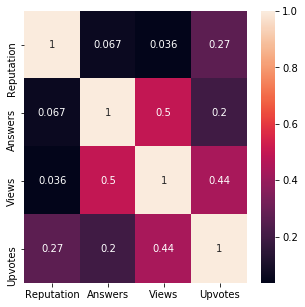

In [12]:
plt.figure(figsize=(5,5))
cmap=train_data.corr()
sns.heatmap(cmap,annot = True)

C:\Users\Manikandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Manikandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


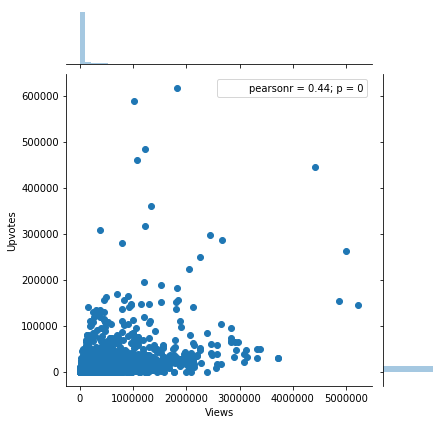

In [13]:
sns.jointplot(x='Views',y='Upvotes', data=train_data)

### pearson correlation co efficient is 0.4,which is high for a large dataset

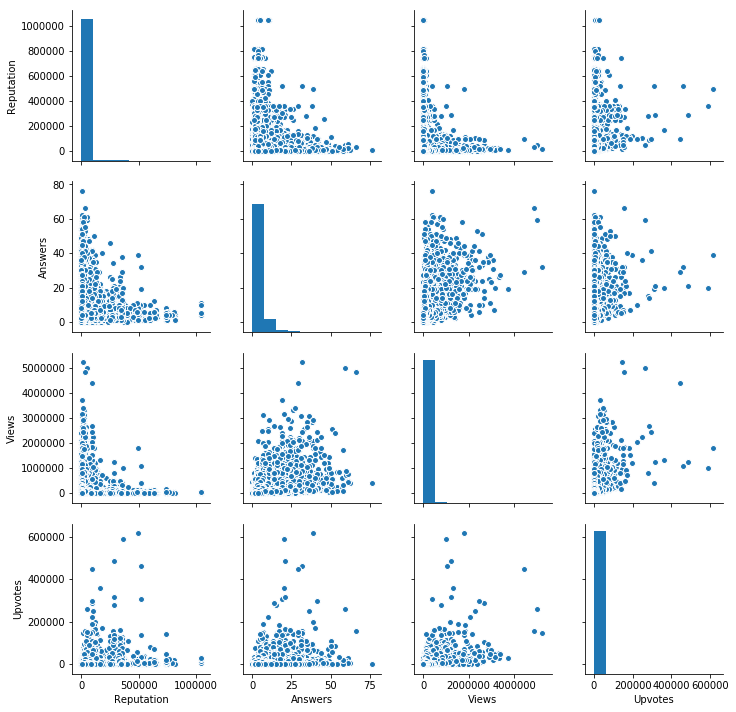

In [14]:
sns.pairplot(train_data)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Tag']=le.fit_transform(train_data['Tag'])

In [16]:
train_data.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [17]:
test_data.drop(['ID','Username'],inplace=True,axis=1)


In [18]:
test_data.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [19]:
test_data['Tag']=le.transform(test_data['Tag'])

In [21]:
test_data.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [23]:
train_data.describe()

,Tag,Reputation,Answers,Views,Upvotes
count,330045.00000,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,3.54305,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.49392,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.00000,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,1.00000,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,4.00000,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,6.00000,5.118000e+03,5.000000,2.687000e+04,107.000000
max,9.00000,1.042428e+06,76.000000,5.231058e+06,615278.000000


In [24]:
from sklearn.preprocessing import Binarizer


In [25]:
bn=Binarizer(threshold=3)
b_ans=bn.transform([train_data['Answers']])[0]

In [26]:
train_data['b_ans']=b_ans

In [27]:
train_data.head()

,Tag,Reputation,Answers,Views,Upvotes,b_ans
0,0,3942.0,2.0,7855.0,42.0,0.0
1,0,26046.0,12.0,55801.0,1175.0,1.0
2,1,1358.0,4.0,8067.0,60.0,1.0
3,0,264.0,3.0,27064.0,9.0,0.0
4,1,4271.0,4.0,13986.0,83.0,1.0


In [28]:
b_ans=bn.transform([test_data['Answers']])[0]

In [29]:
test_data['b_ans']=b_ans

In [30]:
test_data.head()

,Tag,Reputation,Answers,Views,b_ans
0,0,5645.0,3.0,33200.0,0.0
1,1,24511.0,6.0,2730.0,1.0
2,3,927.0,1.0,21167.0,0.0
3,3,21.0,6.0,18528.0,1.0
4,3,4475.0,10.0,57240.0,1.0


In [31]:
train_data.drop(['Answers'],inplace=True,axis=1)
train_data.head()

,Tag,Reputation,Views,Upvotes,b_ans
0,0,3942.0,7855.0,42.0,0.0
1,0,26046.0,55801.0,1175.0,1.0
2,1,1358.0,8067.0,60.0,1.0
3,0,264.0,27064.0,9.0,0.0
4,1,4271.0,13986.0,83.0,1.0


In [32]:
test_data.drop(['Answers'],inplace=True,axis=1)
test_data.head()

,Tag,Reputation,Views,b_ans
0,0,5645.0,33200.0,0.0
1,1,24511.0,2730.0,1.0
2,3,927.0,21167.0,0.0
3,3,21.0,18528.0,1.0
4,3,4475.0,57240.0,1.0


## train-test split

In [33]:
from sklearn.model_selection import train_test_split
X=train_data.drop('Upvotes',axis=1)
y=train_data['Upvotes']

In [35]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

## Polynomial Regression

In [38]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train,y_train)
lin_reg = linear_model.LassoLars(alpha=0.021,max_iter=150)
lin_reg.fit(x_poly,y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=150, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [46]:
pred=poly_reg.fit_transform(X_val)
pred_lin=lin_reg.predict(pred)

In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_val,pred_lin))

0.9133794909306902


In [49]:
test_data.head()

,Tag,Reputation,Views,b_ans
0,0,5645.0,33200.0,0.0
1,1,24511.0,2730.0,1.0
2,3,927.0,21167.0,0.0
3,3,21.0,18528.0,1.0
4,3,4475.0,57240.0,1.0


In [50]:
test_data=sc.fit_transform(test_data)

In [52]:
test_data

array([[-1.42412492, -0.0815434 ,  0.04174163, -0.83200052],
       [-1.02325005,  0.59439988, -0.33750519,  1.20192232],
       [-0.22150031, -0.25058296, -0.10802788, -0.83200052],
       ...,
       [ 0.9811243 , -0.26821065,  0.3385673 ,  1.20192232],
       [ 0.58024943, -0.27749027, -0.24461648, -0.83200052],
       [-1.42412492, -0.26057915, -0.21235498, -0.83200052]])

In [54]:
pred_test=poly_reg.fit_transform(test_data)
pred_fin=lin_reg.predict(pred_test)
pred_fin=abs(pred_fin)

In [57]:
polysub = pd.DataFrame({'Upvotes':pred_fin})

In [58]:
polysub.head()

,Upvotes
0,212.944147
1,63.960190
2,53.397360
3,41.616122
4,274.224822


In [60]:
polysub.to_csv('Upvote_poly.csv',index = False)

In [61]:
test=pd.read_csv("test_8i3B3FC.csv")

In [62]:
ID =test['ID']

In [63]:
polysub1=pd.DataFrame({'ID':ID,'Upvotes':pred_fin})

In [64]:
polysub1.to_csv('Upvote_polyfin.csv',index= False)